# 수들의 합 2

In [1]:
from IPython.display import Image

## 문제

* 재난방재청에서는 많은 비가 내리는 장마철에 대비해서 다음과 같은 일을 계획하고 있다. 먼저 어떤 지역의 높이 정보를 파악한다. 그 다음에 그 지역에 많은 비가 내렸을 때 물에 잠기지 않는 안전한 영역이 최대로 몇 개가 만들어 지는 지를 조사하려고 한다. 이때, 문제를 간단하게 하기 위하여, 장마철에 내리는 비의 양에 따라 일정한 높이 이하의 모든 지점은 물에 잠긴다고 가정한다.

* 어떤 지역의 높이 정보는 행과 열의 크기가 각각 N인 2차원 배열 형태로 주어지며 배열의 각 원소는 해당 지점의 높이를 표시하는 자연수이다. 예를 들어, 다음은 N=5인 지역의 높이 정보이다.

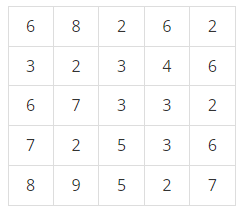

In [2]:
Image('../image/2468_안전 영역1.png', width = 300)

* 이제 위와 같은 지역에 많은 비가 내려서 높이가 4 이하인 모든 지점이 물에 잠겼다고 하자. 이 경우에 물에 잠기는 지점을 회색으로 표시하면 다음과 같다.

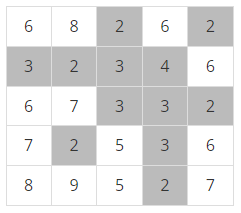

In [3]:
Image('../image/2468_안전 영역2.png', width = 300)

* 물에 잠기지 않는 안전한 영역이라 함은 물에 잠기지 않는 지점들이 위, 아래, 오른쪽 혹은 왼쪽으로 인접해 있으며 그 크기가 최대인 영역을 말한다. 위의 경우에서 물에 잠기지 않는 안전한 영역은 5개가 된다(꼭짓점으로만 붙어 있는 두 지점은 인접하지 않는다고 취급한다).

* 또한 위와 같은 지역에서 높이가 6이하인 지점을 모두 잠기게 만드는 많은 비가 내리면 물에 잠기지 않는 안전한 영역은 아래 그림에서와 같이 네 개가 됨을 확인할 수 있다.

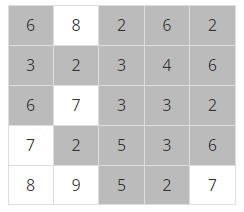

In [4]:
Image('../image/2468_안전 영역3.png', width = 300)

* 이와 같이 장마철에 내리는 비의 양에 따라서 물에 잠기지 않는 안전한 영역의 개수는 다르게 된다. 위의 예와 같은 지역에서 내리는 비의 양에 따른 모든 경우를 다 조사해 보면 물에 잠기지 않는 안전한 영역의 개수 중에서 최대인 경우는 5임을 알 수 있다.

* 어떤 지역의 높이 정보가 주어졌을 때, 장마철에 물에 잠기지 않는 안전한 영역의 최대 개수를 계산하는 프로그램을 작성하시오.

## 입력

* 첫째 줄에는 어떤 지역을 나타내는 2차원 배열의 행과 열의 개수를 나타내는 수 N이 입력된다. N은 2 이상 100 이하의 정수이다. 둘째 줄부터 N개의 각 줄에는 2차원 배열의 첫 번째 행부터 N번째 행까지 순서대로 한 행씩 높이 정보가 입력된다. 각 줄에는 각 행의 첫 번째 열부터 N번째 열까지 N개의 높이 정보를 나타내는 자연수가 빈 칸을 사이에 두고 입력된다. 높이는 1이상 100 이하의 정수이다.

## 출력

* 첫째 줄에 장마철에 물에 잠기지 않는 안전한 영역의 최대 개수를 출력한다.


## Code

In [5]:
#2468_안전영역 (bfs) (그래프이론)

import sys
from collections import deque

def bfs(location_map, st_x, st_y, rainfall, visited):
    x_limit, y_limit = len(location_map[0]), len(location_map)
    position = deque()
    position.append((st_y, st_x))
    visited[st_y][st_x] = True # 중요

    while position:
        y, x = position.popleft()
        dx, dy = [-1, 1, 0, 0], [0, 0, 1, -1]
        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]
            if (0 <= nx < x_limit) & (0 <= ny < y_limit):
                if (location_map[ny][nx] > rainfall) & (not visited[ny][nx]):
                    visited[ny][nx] = True # 중요
                    position.append((ny, nx))

    return visited

def get_safety_zone(location, rainfall):
    x_limit, y_limit = len(location[0]), len(location)
    visited = [[False] * x_limit for _ in range(y_limit)]
    safety_zone = 0
    for y in range(len(location)):
        for x in range(len(location[0])):
            if (location[y][x] > rainfall) & (not visited[y][x]):
                bfs(location, x, y, rainfall, visited)
                safety_zone += 1
    return safety_zone

submit = False

def solution():
    N = int(sys.stdin.readline()) if submit else int(input())
    location = []
    min_height, max_height = float("inf"), float("-inf")
    for _ in range(N):
        row = list(map(int, sys.stdin.readline().split())) if submit else list(map(int, input().split()))
        if max(row) > max_height:
            max_height = max(row)
        location.append(row)

    max_safety_zone = 0
    for i in range(0, max_height+1):
        rst = get_safety_zone(location, i)
        if max_safety_zone < rst:
            max_safety_zone = rst
    print(max_safety_zone)

In [6]:
solution()

5


In [7]:
solution()

6


## Note

https://www.acmicpc.net/problem/2468